In [17]:
import pandas as pd 
import sqlalchemy as sal 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [3]:
customers = pd.read_csv('./datasets/customers.csv')
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
geolocation = pd.read_csv('./datasets/geolocation.csv')
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [5]:
order_items = pd.read_csv('./datasets/order_items.csv')
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
orders = pd.read_csv('./datasets/orders.csv')
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [7]:
payments = pd.read_csv('./datasets/payments.csv')
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [8]:
products = pd.read_csv('./datasets/products.csv')
products.head(2)

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [9]:
sellers = pd.read_csv('./datasets/sellers.csv')
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
orders[pd.notnull(orders) == False]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
csv_files = [
    ('customers.csv', 'customers'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers')
    
]

In [16]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
def get_datatype(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_bool_dtype(dtype):
        return "BIT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "NVARCHAR(MAX)"

In [7]:
engine = sal.create_engine(
    "mssql+pyodbc://DESKTOP-1VNNIKF\SQLEXPRESS/ecommerce"
    "?driver=ODBC+DRIVER+17+FOR+SQL+SERVER"
    "&trusted_conection=yes"
)


print("Connected successfully")

Connected successfully


In [21]:
root_path = r'C:/Users/PMYLS\Desktop/End_To_End_Ecommerce_Data/datasets'

In [24]:
with engine.begin() as connection:
    for csv_file, table_name in csv_files:
        file_path = os.path.join(root_path, csv_file)
        
        df = pd.read_csv(file_path)

        df = df.where(pd.notnull(df), None)

        print(f"Processing: {csv_file}")
        print(f"Null Values: {df.isnull().sum()}\n")


        df.columns = [
            col.replace(" ", "_")
            .replace("-", "_")
            .replace(".", "_")
            for col in df.columns
        ]


        columns_sql = ", ".join(
            f"[{col}] {get_datatype(df[col].dtype)}"
            for col in df.columns
        )

        create_table = f"""
            CREATE TABLE {table_name} ({columns_sql})
        """


        connection.execute(sal.text(create_table))



        df.to_sql(
            table_name, 
            con=connection,
            if_exists="append",
            index=False
        )


Processing: customers.csv
Null Values: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing: geolocation.csv
Null Values: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing: order_items.csv
Null Values: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing: orders.csv
Null Values: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: 

### Q1. List all unique cities where customers are located.

In [11]:
query = "SELECT DISTINCT customer_city FROM customers;"

# Execute and fetch data
with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=["customer_city"])

# Display top rows
df.head()

,customer_city
0,abadia dos dourados
1,abadiania
2,abaete
3,abaetetuba
4,abaiara


### Q2. Count the number of orders placed in 2017.

In [12]:
query = """
    select
	    count(order_id)
    from dbo.orders
    where year(order_purchase_timestamp) = 2017;"""

# Execute and fetch data
with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=["num_of_order"])

# Display top rows
df.head()

,num_of_order
0,45101


### Q3. Find the total sales per category.

In [13]:
query = """
    select
        p.product_category,
        round(sum(o.price), 2) as total_sale
    from dbo.order_items o
    INNER join dbo.products p
        on o.product_id = p.product_id
    GROUP BY p.product_category;
"""

# Execute and fetch data
with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=["product_category", "total_sale"])

# Display top rows
df.head()

,product_category,total_sale
0,Fashion Bags and Accessories,152823.54
1,Market Place,28378.47
2,foods,29393.41
3,PCs,222963.13
4,telephony,323667.53


### Q4. Calculate the percentage of orders that were paid in installments.

In [14]:
query = """
    select 
        cast(sum(
            case 
                when payment_installments >= 1 then 1
                else 0 
            end) * 100 /count(*)
            AS DECIMAL(5, 2)) AS percentage
    from dbo.payments;
    """

# Execute and fetch data
with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=["percentage"])

# Display top rows
df.head()

,percentage
0,99.00


### Q5. Count the number of customers from each state.

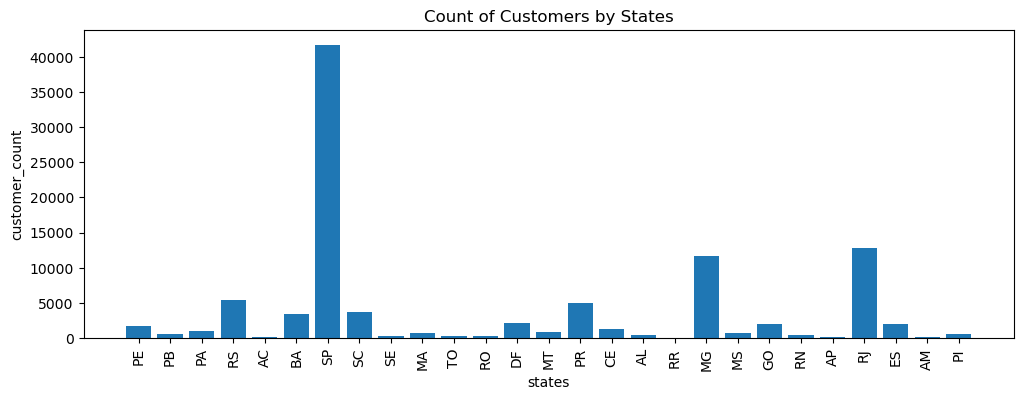

In [15]:
query = """
    select customer_state ,count(customer_id) as count
    from customers group by customer_state
"""

# Execute and fetch data
with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data)

# Display top rows
df.head()

# ploting
plt.figure(figsize=(12, 4))
plt.bar(df['customer_state'], df['count'])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

### Q6. Calculate the number of orders per month in 2018.

     months  order_count
0     April         6939
1    August         6512
2  February         6728


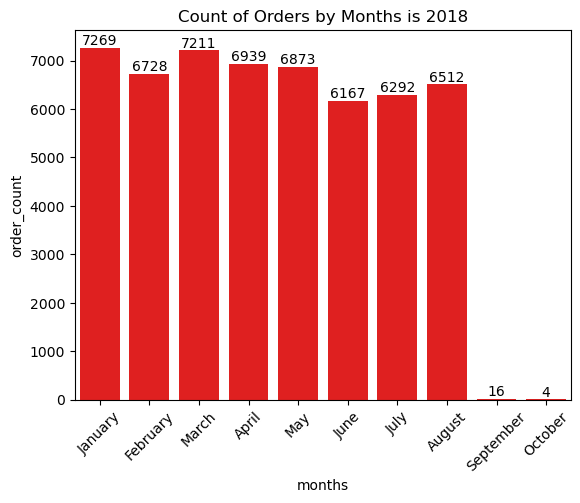

In [18]:
query = """ select datename(month, order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by datename(month, order_purchase_timestamp)
"""

with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data)

print(df.head(3))

df = pd.DataFrame(data)
o = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

### Q7. Find the average number of products per order, grouped by customer city.

In [23]:
query = """
     WITH count_per_order AS (
        SELECT 
            o.order_id,
            o.customer_id,
            COUNT(oi.order_id) AS oc
        FROM orders o
        JOIN order_items oi
            ON o.order_id = oi.order_id
        GROUP BY o.order_id, o.customer_id
    )
    SELECT 
        c.customer_city,
        ROUND(AVG(cpo.oc), 2) AS average_orders
    FROM customers c
    JOIN count_per_order cpo
        ON c.customer_id = cpo.customer_id
    GROUP BY c.customer_city
    ORDER BY average_orders DESC;
"""

with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data)

print(df.head(3))

    customer_city  average_orders
0  padre carvalho               7
1   candido godoi               6
2     celso ramos               6


### Q8. Calculate the percentage of total revenue contributed by each product category.

In [20]:
query = """
     SELECT 
        p.product_category AS category,
        ROUND(
            SUM(pay.payment_value) * 100.0 /
            (SELECT SUM(payment_value) FROM payments),
            2
        ) AS sales_percentage
    FROM products p
    JOIN order_items oi
        ON p.product_id = oi.product_id
    JOIN payments pay
        ON pay.order_id = oi.order_id
    GROUP BY p.product_category
    ORDER BY sales_percentage DESC;
"""

with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data)

print(df.head(3))

               category  sales_percentage
0        bed table bath             10.70
1         HEALTH BEAUTY             10.35
2  computer accessories              9.90


### Q9. Calculate the total revenue generated by each seller, and rank them by revenue.

                          seller_id    revenue  rank
0  7c67e1448b00f6e969d365cea6b010ab  507166.91     1
1  1025f0e2d44d7041d6cf58b6550e0bfa  308222.04     2
2  4a3ca9315b744ce9f8e9374361493884  301245.27     3


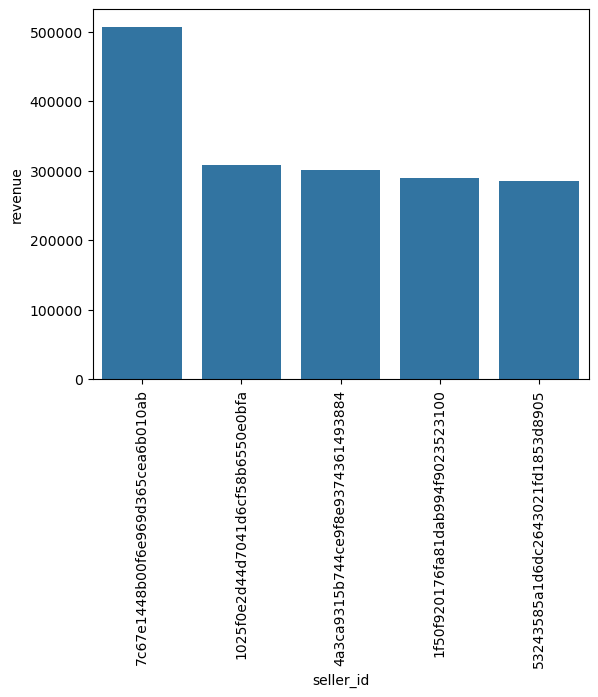

In [21]:
query = """
     SELECT
        oi.seller_id,
        SUM(p.payment_value) AS revenue,
        DENSE_RANK() OVER (ORDER BY SUM(p.payment_value) DESC) AS rank
    FROM order_items oi
    JOIN payments p
        ON oi.order_id = p.order_id
    GROUP BY oi.seller_id
"""

with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data)

print(df.head(3))

sns.barplot(x=df['seller_id'].head(), y=df['revenue'].head(), data=df)
plt.xticks(rotation=90)
plt.show()

### Q10. Calculate the moving average of order values for each customer over their order history.

In [22]:
query = """
     WITH order_payments AS (
        SELECT
            o.customer_id,
            o.order_purchase_timestamp,
            p.payment_value AS payment
        FROM orders o
        JOIN payments p
            ON o.order_id = p.order_id
    )
    SELECT
        customer_id,
        order_purchase_timestamp,
        payment,
        AVG(payment) OVER (
            PARTITION BY customer_id
            ORDER BY order_purchase_timestamp
            ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
        ) AS moving_avg
    FROM order_payments;
"""

with engine.connect() as connection:
    result = connection.execute(sal.text(query))
    data = result.fetchall()
    df = pd.DataFrame(data)

print(df.head(3))

                        customer_id order_purchase_timestamp  payment  \
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
1  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32    67.41   
2  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43   195.42   

   moving_avg  
0      114.74  
1       67.41  
2      195.42  
